In [1]:
import erlab.plotting.erplot as eplt
import matplotlib.pyplot as plt
import xarray as xr

xr.set_options(display_expand_data=False, keep_attrs=True)

Let's generate some example data, this time in angle coordinates.

In [2]:
from erlab.interactive.exampledata import generate_data_angles

dat = generate_data_angles()
dat

<xarray.DataArray (alpha: 500, beta: 60, eV: 500)> Size: 120MB
2.271e+03 2.251e+03 2.228e+03 2.25e+03 ... 9.146e-17 3.668e-16 9.288e-17
Coordinates:
  * alpha    (alpha) float64 4kB -15.0 -14.94 -14.88 -14.82 ... 14.88 14.94 15.0
  * beta     (beta) float64 480B -15.0 -14.49 -13.98 -13.47 ... 13.98 14.49 15.0
  * eV       (eV) float64 4kB -0.45 -0.4489 -0.4477 ... 0.1177 0.1189 0.12
    xi       float64 8B 0.0
    delta    float64 8B 0.0
    hv       float64 8B 50.0
Attributes:
    configuration:        1
    temp_sample:          20.0
    sample_workfunction:  4.5

Let us define a 2D cut from the map data we just generated.

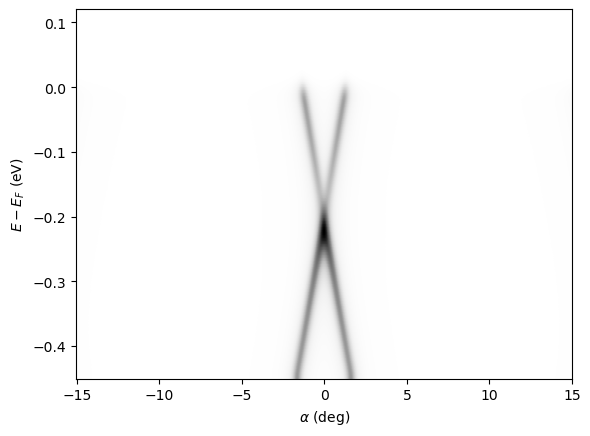

In [3]:
cut = dat.sel(beta=10.0, method="nearest")
eplt.plot_array(cut.T, cmap="Greys")

In [4]:
dat.kspace.offsets

delta,0.0
xi,0.0
beta,0.0


In [5]:
dat.kspace.offsets = {'delta': 0.0, 'xi': 0.0, 'beta': 0.0}
dat_kconv = dat.kspace.convert()

Estimating bounds and resolution
Calculating destination coordinates
Converting ('eV', 'alpha', 'beta')  ->  ('eV', 'ky', 'kx')
Interpolated in 0.722 s


In [6]:
dat_kconv

<xarray.DataArray (eV: 500, ky: 310, kx: 310)> Size: 384MB
nan nan nan nan nan nan nan nan nan nan ... nan nan nan nan nan nan nan nan nan
Coordinates:
  * kx       (kx) float64 2kB -0.8956 -0.8898 -0.884 ... 0.884 0.8898 0.8956
  * ky       (ky) float64 2kB -0.8956 -0.8898 -0.884 ... 0.884 0.8898 0.8956
  * eV       (eV) float64 4kB -0.45 -0.4489 -0.4477 ... 0.1177 0.1189 0.12
    xi       float64 8B 0.0
    delta    float64 8B 0.0
    hv       float64 8B 50.0
Attributes:
    configuration:        1
    temp_sample:          20.0
    sample_workfunction:  4.5
    delta_offset:         0.0
    xi_offset:            0.0
    beta_offset:          0.0